In [2]:
# clustering with k-means


In [3]:
# Euclidean distance of A and B array of height, weight and age
import numpy as np
A = np.array([165,50,22])
B = np.array([185,80,21])

In [4]:
D = (A-B)
D = D**2
D = np.sqrt(np.sum(D))
print (D)

36.0693775937


In [5]:
# creating an example with image data

from sklearn.datasets import load_digits
digits = load_digits()
x = digits.data
ground_truth = digits.target

In [6]:
# processing the digit data using PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components = 40)
Cx = pca.fit_transform(scale(x))

print ('Explained variance %0.3f' % sum(pca.explained_variance_ratio_))

Explained variance 0.951


In [7]:
# importing the kmeans class
# n_clusters is the K number of centroids to find
# n_init is the number of times to try the k means with different
# starting centroids.

from sklearn.cluster import KMeans
clustering = KMeans(n_clusters = 10, n_init =10, random_state = 1)
clustering.fit(Cx)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [8]:
# the fit method of the KMeans clustering produces a scaled
# and dimensionally reduced dataset.

In [9]:
# cross tabulation of ground truth and K-means clusters.

import numpy as np
import pandas as pd

ms = np.column_stack((ground_truth, clustering.labels_))

In [10]:
np.column_stack.__doc__

'\n    Stack 1-D arrays as columns into a 2-D array.\n\n    Take a sequence of 1-D arrays and stack them as columns\n    to make a single 2-D array. 2-D arrays are stacked as-is,\n    just like with `hstack`.  1-D arrays are turned into 2-D columns\n    first.\n\n    Parameters\n    ----------\n    tup : sequence of 1-D or 2-D arrays.\n        Arrays to stack. All of them must have the same first dimension.\n\n    Returns\n    -------\n    stacked : 2-D array\n        The array formed by stacking the given arrays.\n\n    See Also\n    --------\n    hstack, vstack, concatenate\n\n    Examples\n    --------\n    >>> a = np.array((1,2,3))\n    >>> b = np.array((2,3,4))\n    >>> np.column_stack((a,b))\n    array([[1, 2],\n           [2, 3],\n           [3, 4]])\n\n    '

In [11]:
df = pd.DataFrame(ms, columns = ['Ground truth', 'cluster'])
df.head()

,Ground truth,cluster
0,0,8
1,1,1
2,2,1
3,3,2
4,4,0


In [12]:
pd.crosstab(df['Ground truth'], df['cluster'], margins = True)

cluster,0,1,2,3,4,5,6,7,8,9,All
Ground truth,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,177,0,178
1,0,96,0,27,1,0,0,0,0,58,182
2,0,24,6,141,0,1,0,0,1,4,177
3,0,7,160,1,0,7,8,0,0,0,183
4,158,2,0,0,0,4,1,9,0,7,181
5,2,2,39,0,3,0,136,0,0,0,182
6,0,4,0,0,175,0,0,0,1,1,181
7,0,1,0,0,0,157,1,17,0,3,179
8,0,99,48,1,3,2,6,0,1,14,174


In [13]:
# visualizing the cases that are nearest to each centroid

import matplotlib.pyplot as plt

for k, img in enumerate(np.argmin(dist, axis = 0)):
    cluster = clustering.labels_[img]
    plt.subplot(2,5,cluster)
    plt.imshow(digits.images[img], cmap = 'binary', interpolation = 'none')
    plt.title('c1 ' + str(cluster))
plt.show()

NameError: name 'dist' is not defined

In [ ]:
# inertia is used to measure the viability of a cluster. Inertia is the
# sum of all the difference between every cluster member and its centroid.

inertia = list()
delta_inertia = list()
for k in range(1,21):
    clustering = KMeans(n_clusters = k, n_init = 10, random_state = 1)
    clustering.fit(Cx)
    if inertia: # so we won't compare the solution k == 1
        delta_inertia.append(inertia[-1] - clustering.inertia_)
    inertia.append(clustering.inertia_)

In [ ]:
# you use the inertia variable inside the clustering class after 
# fitting the clustering. The inertia variable is a list containing the
# rate of change of inertia between a solution and the previous one.

import matplotlib.pyplot as plt
plt.figure()
plt.plot([k for k in range(2,21)], delta_inertia, 'ko-')
plt.xlabel('Number of clusters')
plt.ylabel('Rate of change of inertia')
plt.show()

In [ ]:
# in the above view the first downward jumb is at k = 17, therefore
# we evaluate solution k = 16. Another interesting jump at k = 19, therefore
# we evaluate solution k = 18.

# The rate of change of inertia will provide you with just a few
# tips where there could be good cluster solutions. It is left to you
# to decide which to pick if you need to get some extra insight on data.

In [ ]:
# using the MiniBatchKMeans, which is a variant that can cluster 
# separate chunk of data.

In [ ]:
from sklearn.cluster import MiniBatchKMeans
batch_clustering = MiniBatchKMeans(n_clusters = 10, random_state = 1)

In [ ]:
batch = 100
guessed_labels = list()
inertia = 0
for row in range(0, len(Cx), batch):
    if row+ batch < len(Cx):
        feed = Cx[row:row+batch, :]
    else:
        feed = Cx[row:,:]
    batch_clustering.partial_fit(feed)
    # we have to stack results in a list, because
    # MiniBatchKMean does not take track of all the 
    # batches
    guessed_labels.append(batch_clustering.labels_)
    inertia += batch_clustering.inertia_

# Numpy hstack turns a list of arrays into an array
# by inspecting the variable guess_labels you can know 
# the assigned cluster
guessed_labels = np.hstack(guessed_labels)
print ("Kmeans inertia: %0.1f" % (clustering.inertia_))
print ("MiniBatchKmeans inertia: %0.1f", inertia)


In [15]:
# applying agglomerativeclustering

from sklearn.cluster import AgglomerativeClustering

# Affinity = ['euclidean', 'l1','l2', 'manhattan', 'cosine']
# linkage = ['ward', 'complete, 'average']

Hclustering = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean',
                                     linkage = 'ward')
Hclustering.fit(Cx)

ms = np.column_stack((ground_truth, Hclustering.labels_))
df = pd.DataFrame(ms, columns = ['Ground truth', 'Clusters'])
pd.crosstab(df['Ground truth'], df['Clusters'], margins = True)

Clusters,0,1,2,3,4,5,6,7,8,9,All
Ground truth,,,,,,,,,,,
0,0,0,0,0,0,178,0,0,0,0,178
1,1,27,61,0,0,0,0,93,0,0,182
2,0,129,0,1,1,0,0,46,0,0,177
3,0,4,0,0,2,0,0,31,0,146,183
4,1,0,165,1,0,0,0,4,10,0,181
5,176,1,0,0,0,0,1,1,0,3,182
6,0,0,0,0,0,0,180,1,0,0,181
7,1,0,0,0,169,0,0,1,8,0,179
8,0,3,1,0,0,0,0,169,0,1,174


In [17]:
import sklearn
sklearn.cluster.AgglomerativeClustering.__doc__

'\n    Agglomerative Clustering\n\n    Recursively merges the pair of clusters that minimally increases\n    a given linkage distance.\n\n    Read more in the :ref:`User Guide <hierarchical_clustering>`.\n\n    Parameters\n    ----------\n    n_clusters : int, default=2\n        The number of clusters to find.\n\n    connectivity : array-like or callable, optional\n        Connectivity matrix. Defines for each sample the neighboring\n        samples following a given structure of the data.\n        This can be a connectivity matrix itself or a callable that transforms\n        the data into a connectivity matrix, such as derived from\n        kneighbors_graph. Default is None, i.e, the\n        hierarchical clustering algorithm is unstructured.\n\n    affinity : string or callable, default: "euclidean"\n        Metric used to compute the linkage. Can be "euclidean", "l1", "l2",\n        "manhattan", "cosine", or \'precomputed\'.\n        If linkage is "ward", only "euclidean" is accept

In [18]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters = 100, n_init = 10, random_state = 1)
clustering.fit(Cx)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [20]:
type(clustering)

sklearn.cluster.k_means_.KMeans

In [21]:
clustering.fit.__doc__

'Compute k-means clustering.\n\n        Parameters\n        ----------\n        X : array-like or sparse matrix, shape=(n_samples, n_features)\n            Training instances to cluster.\n        '

In [23]:
Kx = clustering.cluster_centers_
Kx_mapping = {case:cluster for case, cluster in enumerate(clustering.labels_)}

In [24]:
from sklearn.cluster import AgglomerativeClustering
Hclustering = AgglomerativeClustering(n_clusters = 10, affinity = 'cosine', linkage = 'complete')
Hclustering.fit(Kx)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='complete',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x0000000005073510>)

In [25]:
H_mapping = {case: cluster for case, cluster in enumerate(Hclustering.labels_)}
final_mapping = {case:H_mapping[Kx_mapping[case]] for case in Kx_mapping}

In [30]:
ms = np.column_stack((ground_truth, [final_mapping[n] for n in range(max(final_mapping)+1)]))
df = pd.DataFrame(ms, columns = ['Ground truth', 'Clusters'])
pd.crosstab(df['Ground truth'], df['Clusters'], margins = True)

Clusters,0,1,2,3,4,5,6,7,8,9,All
Ground truth,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,178,0,178
1,96,0,3,0,0,24,0,0,0,59,182
2,4,2,9,109,1,42,0,0,0,10,177
3,0,172,1,5,3,1,0,0,0,1,183
4,2,0,0,3,12,0,0,164,0,0,181
5,0,12,1,71,0,0,97,1,0,0,182
6,1,0,178,0,0,0,0,0,2,0,181
7,73,0,0,3,102,0,0,1,0,0,179
8,32,57,0,64,1,0,0,0,0,20,174


In [41]:
# moving beyond the round-shaped clusters: DBSCAN

from sklearn.cluster import DBSCAN
DB = DBSCAN(eps = 4.35, min_samples = 25)
DB.fit(Cx)

DBSCAN(algorithm='auto', eps=4.35, leaf_size=30, metric='euclidean',
    min_samples=25, n_jobs=1, p=None)

In [40]:
search = sklearn.cluster.DBSCAN.__doc__
'min_samples' in search

True

In [42]:
def name(x,y):
    return x, y


In [43]:
name(2,3)

(2, 3)

In [45]:
from collections import Counter
print (Counter(DB.labels_))

Counter({-1: 913, 3: 222, 0: 176, 2: 162, 1: 134, 4: 104, 5: 86})


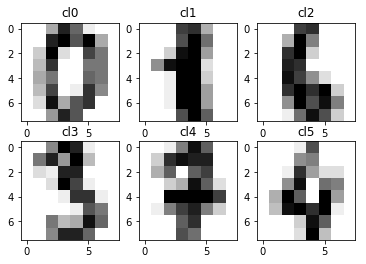

Clusters,-1,0,1,2,3,4,5,All
Ground truth,,,,,,,,
0,4,174,0,0,0,0,0,178
1,89,0,93,0,0,0,0,182
2,176,0,1,0,0,0,0,177
3,68,0,0,0,115,0,0,183
4,95,0,0,0,0,0,86,181
5,178,0,0,1,3,0,0,182
6,17,1,2,161,0,0,0,181
7,75,0,0,0,0,104,0,179
8,115,0,38,0,21,0,0,174


In [47]:
import matplotlib.pyplot as plt
for k,cl in enumerate(np.unique(DB.labels_)):
    if cl >= 0:
        example = np.min(np.where(DB.labels_ == cl))
        plt.subplot(2,3,k)
        plt.imshow(digits.images[example],cmap = 'binary', interpolation = 'none')
        plt.title('cl' +str(cl))
        
plt.show()
ms = np.column_stack((ground_truth, DB.labels_))
df = pd.DataFrame(ms, columns = ['Ground truth', 'Clusters'])
pd.crosstab(df['Ground truth'], df['Clusters'], margins = True)